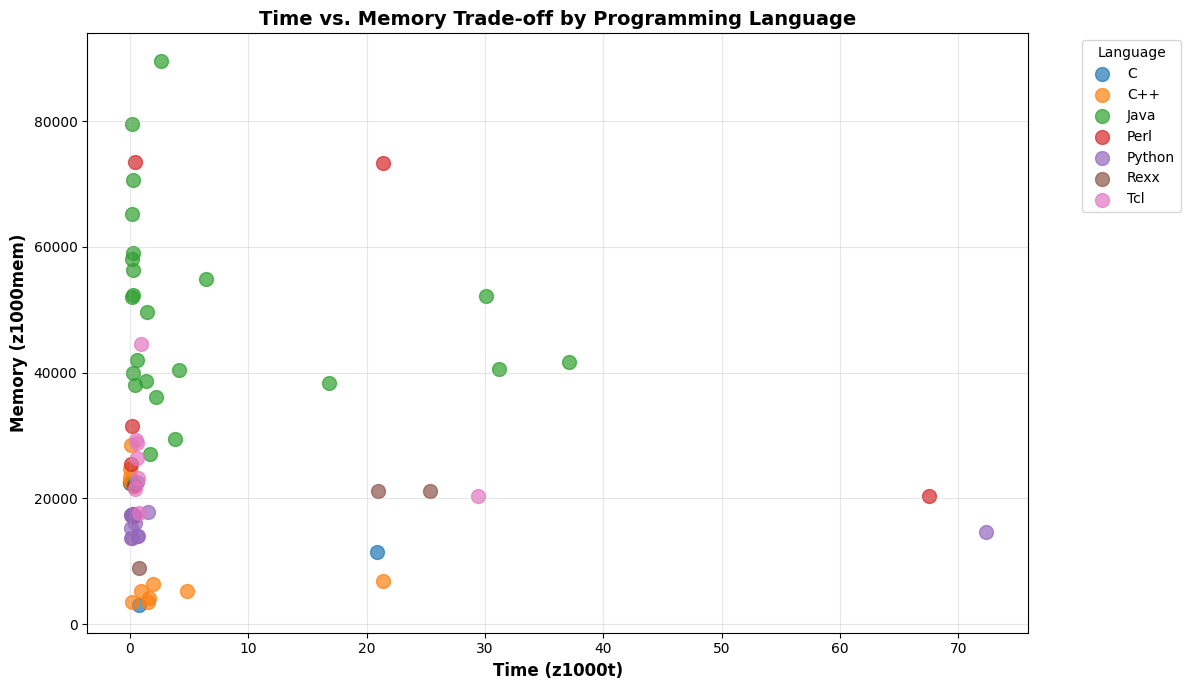

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv')

# Normalize language names to title case
df['lang'] = df['lang'].str.title()

# Filter out extreme values - keep only z1000t values <= 100
df_filtered = df[df['z1000t'] <= 100].copy()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Define colors for each language
colors = {
    'C': '#1f77b4',
    'C++': '#ff7f0e',
    'Java': '#2ca02c',
    'Perl': '#d62728',
    'Python': '#9467bd',
    'Rexx': '#8c564b',
    'Tcl': '#e377c2'
}

# Create scatter plot colored by language
for lang in sorted(df_filtered['lang'].unique()):
    lang_data = df_filtered[df_filtered['lang'] == lang]
    ax.scatter(lang_data['z1000t'], lang_data['z1000mem'],
              label=lang, s=100, alpha=0.7, color=colors.get(lang, '#000000'))

# Customize plot
ax.set_xlabel('Time (z1000t)', fontsize=12, fontweight='bold')
ax.set_ylabel('Memory (z1000mem)', fontsize=12, fontweight='bold')
ax.set_title('Time vs. Memory Trade-off by Programming Language', fontsize=14, fontweight='bold')
ax.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Data points for boxplot: 74 rows


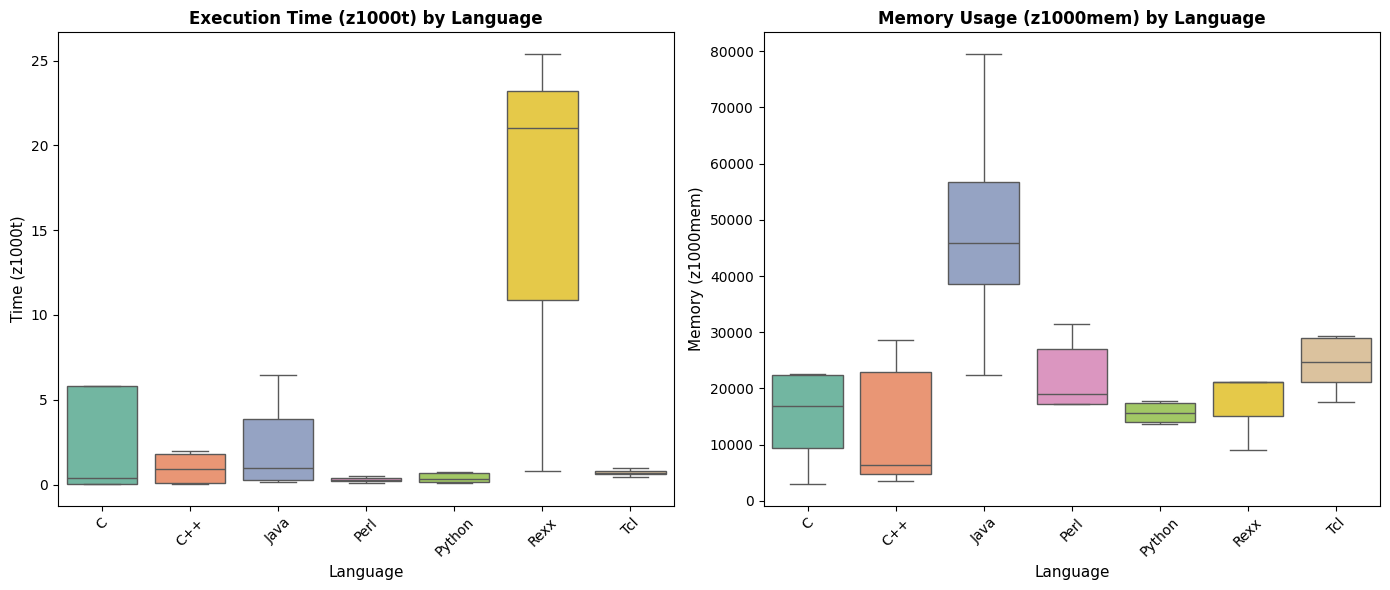


Time statistics by language:
        count       mean        std    min       25%      50%       75%   max
lang                                                                         
C         4.0   5.429250  10.319371  0.017   0.04175   0.4000   5.78750  20.9
C++      11.0   2.974182   6.279177  0.033   0.06650   0.9170   1.82500  21.4
Java     24.0   5.937542  11.004362  0.150   0.26700   0.9830   3.87475  37.1
Perl     12.0   7.625000  19.811175  0.083   0.20000   0.2670   0.38325  67.5
Python   12.0   6.434667  20.746583  0.083   0.12900   0.3500   0.67075  72.3
Rexx      3.0  15.739000  13.108759  0.817  10.90850  21.0000  23.20000  25.4
Tcl       8.0   4.266750  10.156463  0.467   0.60450   0.6665   0.82900  29.4

Memory statistics by language:
        count          mean           std      min      25%      50%      75%  \
lang                                                                            
C         4.0  14830.000000   9471.658496   2952.0   9318.0  16936.0  2244

In [14]:
# Graph: Time vs Memory Trade-off Analysis (Boxplot version - without outliers)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv')

# Normalize language names to title case
df['lang'] = df['lang'].str.title()

# Filter data - keep only z1000t values <= 100
plot_data = df[(df['z1000t'] <= 100) & (df['z1000t'].notna()) & (df['z1000mem'].notna())].copy()

print(f"Data points for boxplot: {len(plot_data)} rows")

# Create boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot 1: z1000t by language (without outliers)
sns.boxplot(data=plot_data, x='lang', y='z1000t', ax=axes[0], hue='lang', palette='Set2', showfliers=False, legend=False)
axes[0].set_title('Execution Time (z1000t) by Language', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Language', fontsize=11)
axes[0].set_ylabel('Time (z1000t)', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)

# Boxplot 2: z1000mem by language (without outliers)
sns.boxplot(data=plot_data, x='lang', y='z1000mem', ax=axes[1], hue='lang', palette='Set2', showfliers=False, legend=False)
axes[1].set_title('Memory Usage (z1000mem) by Language', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Language', fontsize=11)
axes[1].set_ylabel('Memory (z1000mem)', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTime statistics by language:")
print(plot_data.groupby('lang')['z1000t'].describe())
print("\nMemory statistics by language:")
print(plot_data.groupby('lang')['z1000mem'].describe())

Data points: 72 rows


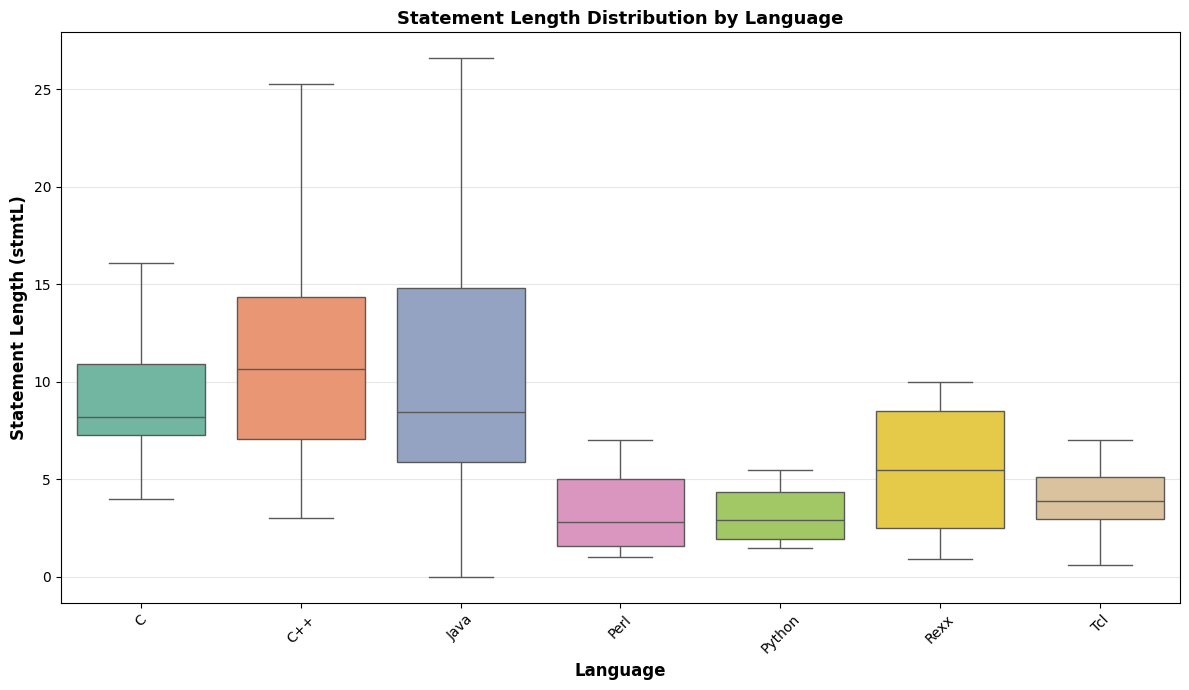


=== STATEMENT LENGTH STATISTICS BY LANGUAGE ===
        count   mean   std   min   25%    50%    75%   max
lang                                                      
C         5.0   9.30  4.53  4.00  7.30   8.20  10.90  16.1
C++      10.0  11.42  7.03  3.00  7.05  10.65  14.38  25.3
Java     20.0  11.52  9.25  0.00  5.90   8.45  14.80  39.7
Perl     13.0   3.38  2.23  1.00  1.58   2.83   5.00   7.0
Python   12.0   3.20  1.40  1.50  1.94   2.92   4.36   5.5
Rexx      4.0   5.48  4.23  0.93  2.48   5.50   8.50  10.0
Tcl       8.0   4.72  3.87  0.60  2.97   3.88   5.12  13.0


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv')

# Normalize language names to title case
df['lang'] = df['lang'].str.title()

# Convert to numeric
df['stmtL'] = pd.to_numeric(df['stmtL'], errors='coerce')

# Clean data - remove extreme values and NaN, limit stmtL to 40
plot_data = df[(df['stmtL'] <= 40) & (df['stmtL'].notna())].copy()

print(f"Data points: {len(plot_data)} rows")

# Create figure with boxplot
fig, ax = plt.subplots(figsize=(12, 7))

# Boxplot - stmtL distribution by language (without outliers)
sns.boxplot(data=plot_data, x='lang', y='stmtL', ax=ax, hue='lang', palette='Set2', showfliers=False, legend=False)
ax.set_xlabel('Language', fontsize=12, fontweight='bold')
ax.set_ylabel('Statement Length (stmtL)', fontsize=12, fontweight='bold')
ax.set_title('Statement Length Distribution by Language', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== STATEMENT LENGTH STATISTICS BY LANGUAGE ===")
print(plot_data.groupby('lang')['stmtL'].describe().round(2))

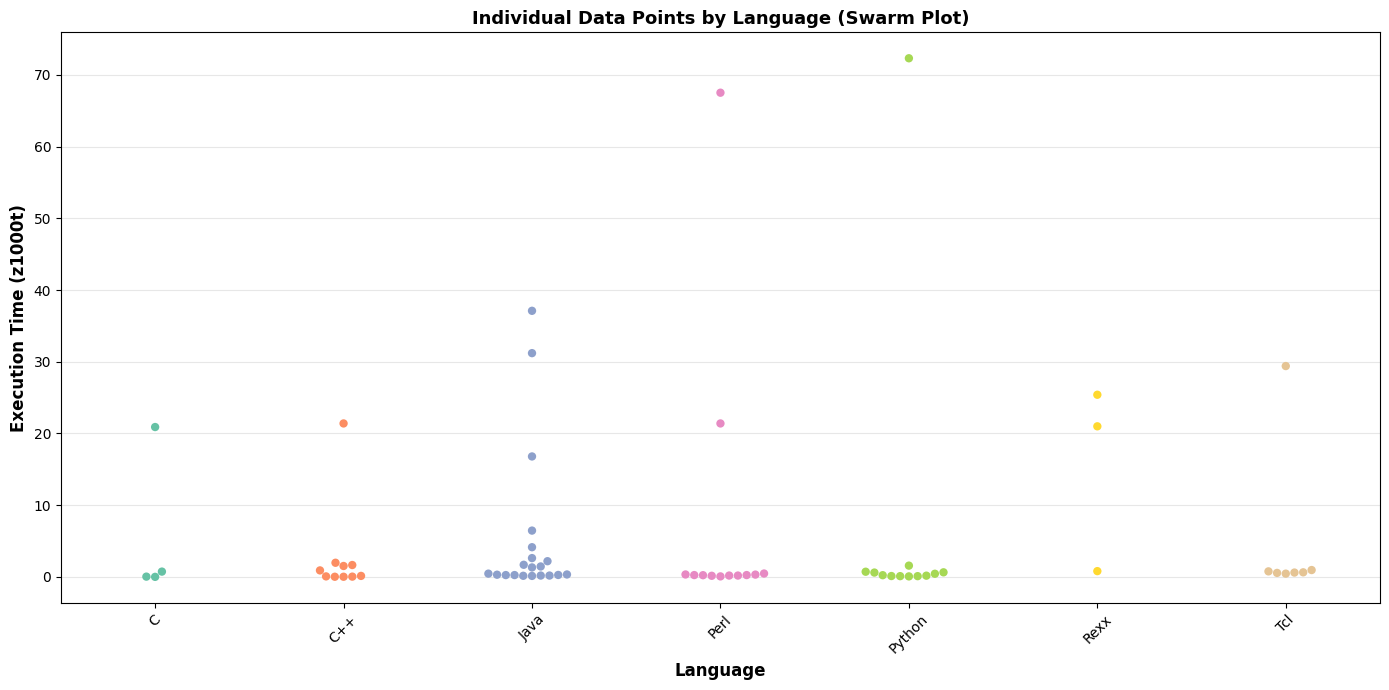


Data points: 68 rows
Correlation: -0.044

=== EXECUTION TIME STATISTICS BY LANGUAGE ===
        count   mean    std   min    25%    50%    75%   max
lang                                                        
C         4.0   5.43  10.32  0.02   0.04   0.40   5.79  20.9
C++      10.0   2.78   6.59  0.03   0.06   0.53   1.63  21.4
Java     20.0   5.39  10.59  0.15   0.27   0.90   3.01  37.1
Perl     12.0   7.62  19.81  0.08   0.20   0.27   0.38  67.5
Python   12.0   6.43  20.75  0.08   0.13   0.35   0.67  72.3
Rexx      3.0  15.74  13.11  0.82  10.91  21.00  23.20  25.4
Tcl       7.0   4.78  10.86  0.47   0.59   0.65   0.88  29.4


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv')
df['lang'] = df['lang'].str.title()
df['stmtL'] = pd.to_numeric(df['stmtL'], errors='coerce')
df['z1000t'] = pd.to_numeric(df['z1000t'], errors='coerce')

plot_data = df[(df['stmtL'] <= 40) & (df['z1000t'] <= 100) &
               (df['stmtL'].notna()) & (df['z1000t'].notna())].copy()

# Create figure with just swarm plot
fig, ax = plt.subplots(figsize=(14, 7))

# Swarm plot with smaller marker size to fit all points
sns.swarmplot(data=plot_data, x='lang', y='z1000t', hue='lang', size=6, ax=ax, palette='Set2', legend=False)
ax.set_xlabel('Language', fontsize=12, fontweight='bold')
ax.set_ylabel('Execution Time (z1000t)', fontsize=12, fontweight='bold')
ax.set_title('Individual Data Points by Language (Swarm Plot)', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nData points: {len(plot_data)} rows")
print(f"Correlation: {plot_data['stmtL'].corr(plot_data['z1000t']):.3f}")
print("\n=== EXECUTION TIME STATISTICS BY LANGUAGE ===")
print(plot_data.groupby('lang')['z1000t'].describe().round(2))